## Bike Sharing Project 
    - Using Multiple Linear Regression
    - Submitted by Chaitanya Murakonda

# General Information
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# Problem Statement 
- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Data Dictionary
day.csv have the following fields: 

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [31]:
# EDA Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Stats Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Linear Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

#supress warnings
import warnings
warnings.filterwarnings('ignore')


1. Data Import & Data Wrangling
    1. Step1 : Data import and Data validation 
    2. Step 2 : Data Quality Check
    3. Step 3 : Data Cleaning
2. Explanatory Data Analysis (EDA)
    1. Univariate Analysis - Numerical & Categorical
    2. Bi-Variate Analysis
3. Data Preparation - Model
    1. Data preparation - Dummy variables , ..
    2. Data Split into Train and Test
    3. Build Model using variables from RFE
4. feature selection
    1. Automated (RFE)
    2. Manual (p-value , VIF)
    3. Hybrid (Automated + Manual)
5. Model Building
6. Model Evolution
    1. Residual Analysis
    2. Linearity Check
    3. R-squared values
    4. Adjusted R2
7. Conclusion
    


### 1. Data import and Data wrangling
1. data import
2. data shape and head to know about data
3. data info to check datatypes and null values
4. describe to check the numerical data

In [32]:
# 1. data import
bike_sharing_df = pd.read_csv('data/day.csv')

In [33]:
# 2. data shape and head to know about data
# bike_sharing_df.shape  # (730, 16)
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
# 3. data info to check datatypes
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [35]:
# 4. describe to check the numerical data
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.2. Data Quality Check
    1. Percentage of missing values in each column 
    2. Duplicate values in the data

    Conclusions Based on EDA : 
        - There are no missing values
        - Imputation of data not required
        - No duplicate data found
    

In [36]:
# 1. Percentage of missing values in each column 
# bike_sharing_df.isnull().sum()/bike_sharing_df.shape[0] # or below
round(bike_sharing_df.isnull().sum()/len(bike_sharing_df),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [37]:
# 2. Duplicate values in the data
bike_dupl = bike_sharing_df.copy()
bike_dupl.drop_duplicates(inplace=True)
if bike_dupl.shape == bike_sharing_df.shape:
    print("No Duplicates in the dataset")
else:
    print("duplicates dropped used new dataframe")

No Duplicates in the dataset


### 1.3 Data Cleaning
    1. Unknown or Junk values in data - by using value_counts
    2. Removing Redundant & unwanted columns

In [38]:
# 1. Unknown or Junk values in data - by using value_counts
bike_sharing_df.value_counts(ascending=False).head(1)
    

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

In [39]:
# 2. Removing Redundant & unwanted columns
# Droping instant column as it is only index column 
bike_sharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
# bike_sharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns -> cnt column which is sum of the both that is the target column

bike_sharing_df.drop(['casual'], axis = 1, inplace = True)
bike_sharing_df.drop(['registered'], axis = 1, inplace = True)

## Explanatory Data Analysis
    - Univariate Analysis
    - Bivariate Analysis
    - MultiVariate Analysis

In [40]:
bike_sharing_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [41]:
# columns holding numerical data
numerical_columns = ['temp','atemp','hum','windspeed'] # based on data dictionary and describe method	
categorical_columns=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

category_variable_name_dict = {
   'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
   'yr' : {0: '2018', 1: '2019'},
   'mnth': { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"},
   'holiday': {0: 'Holiday', 1: 'Not Holiday'},
   'weekday': {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
   'workingday': {0: 'Working Day', 1: 'Not Working Day'},
   'weathersit': {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
                  }
}

for category in category_variable_name_dict:
    bike_sharing_df[category] = bike_sharing_df[category].map(category_variable_name_dict[category]) 

In [42]:
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,2018,January,Holiday,Saturday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,2018,January,Holiday,Sunday,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,2018,January,Holiday,Monday,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,2018,January,Holiday,Tuesday,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,2018,January,Holiday,Wednesday,Not Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


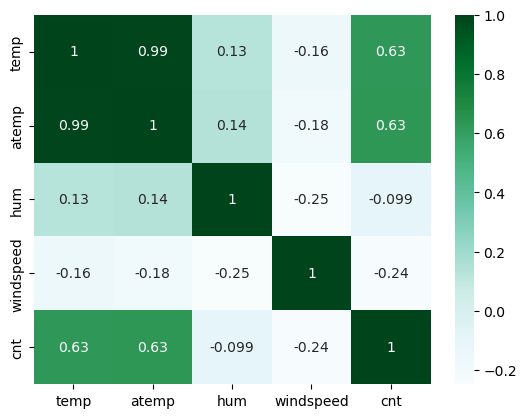

In [45]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_sharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()